In [2]:
# Copyright 2020 The Authors. All Rights Reserved.
#
# GNU General Public License v3.0
# Permissions of this strongest copyleft license are conditioned on 
# making available complete source code of licensed works and modifications, 
# which include larger works using a licensed work, under the same license. 
# Copyright and license notices must be preserved. 
# Contributors provide an express grant of patent rights. 
# When a modified version is used to provide a service over a network, 
# the complete source code of the modified version must be made available.
# ==============================================================================

# Title: RNA prediction of CRISPR repeats/spacers clustered with Autoencoder
# Author: Hyunjin Shim
# Date created: 20200313
# Email: jinenstar@gmail.com

# Processing RNA prediction of CRISPR repeats/spacers

- to process RNA prediction of CRISPR repeats/spacers clustered with Autoencoder

# Dataset description

- repeats/spacers clustered with Autoecndoer by Type from CRISPR-Cas++

In [133]:
# Data
import os
import pandas as pd
import numpy as np

# Biopython
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

# Regular expression
import re

# Plot
from pylab import *
import pylab as pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Math
import math
from statistics import mean, stdev

# location of raw data file
datapath = '/Users/jinenstar/Desktop/Data/CRISPR/CRISPR-Cas++/RNA_structure'
os.chdir(datapath)

In [98]:
file_in = 'Repeat_0_RNAfold.txt'

data_Repeat_0 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Repeat_0
data_Repeat_0_ID = data_Repeat_0.iloc[0::3,:]
data_Repeat_0_seq = data_Repeat_0.iloc[1::3,:]
data_Repeat_0_ene = data_Repeat_0.iloc[2::3,:].iloc[:, 0].tolist()
#data_Repeat_0_ene[0]

Repeat_energy_0 = []
for word in data_Repeat_0_ene:
    Repeat_energy_0.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Repeat_energy_0 = [float(x) for x in Repeat_energy_0]
Repeat_energy_0

[-2.4,
 -12.1,
 -4.4,
 -4.0,
 0.0,
 -7.6,
 -2.6,
 -0.1,
 -7.4,
 -3.4,
 -4.8,
 -8.9,
 -4.1,
 -1.3,
 -4.8,
 -4.4,
 -7.1,
 -7.8,
 0.0,
 -8.0,
 -5.2,
 -4.4,
 -2.8,
 -4.7,
 -4.8,
 -4.2,
 -4.2,
 -0.6,
 -7.3,
 -7.9,
 0.0,
 -1.2,
 -4.5,
 -8.8,
 -6.1,
 -7.2,
 -5.2,
 -3.6,
 -0.7,
 -5.2,
 -6.8,
 -7.9,
 0.0,
 -3.0,
 -0.3,
 -3.1,
 -5.0,
 -8.7,
 -0.3,
 -1.7,
 -1.2,
 -4.5,
 -5.6,
 -3.0,
 -0.7,
 -6.5,
 -2.6,
 -3.7,
 -1.5,
 0.0,
 -4.3,
 -2.1,
 -1.1,
 0.0,
 -9.8,
 0.0,
 -0.9,
 -4.2,
 -7.8,
 -0.6,
 -0.9,
 -2.4,
 -2.7,
 -9.6,
 -5.4,
 -5.2,
 0.0,
 -4.9,
 -2.7,
 -5.2,
 -0.2,
 -0.8,
 -4.7,
 -0.2,
 -2.2,
 -9.5,
 -7.8,
 -5.4,
 -5.8,
 -1.1,
 -5.5,
 -3.7,
 -3.6,
 -4.8,
 -4.0,
 -4.2,
 -1.6,
 -20.5,
 -6.5,
 -9.0,
 -2.7,
 -1.4,
 -3.5,
 -2.57,
 -5.0,
 -9.5,
 -8.0,
 -5.6,
 -0.8,
 -4.0,
 -0.9,
 -1.4,
 -5.3,
 -7.9,
 -4.4,
 -2.4,
 -3.2,
 -3.8,
 -7.4,
 -3.2,
 -2.6,
 -2.5,
 -6.9,
 0.0,
 -3.9,
 -13.6,
 -6.5,
 -9.1,
 -4.5,
 -5.7,
 0.0,
 -3.8,
 -1.4,
 -3.7,
 -4.6,
 -7.0,
 -2.9,
 -0.5,
 -0.8,
 -2.8,
 -3.0,
 -4.8,
 -3.3,
 -4.6

In [99]:
file_in = 'Repeat_1_RNAfold.txt'

data_Repeat_1 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Repeat_0
data_Repeat_1_ID = data_Repeat_1.iloc[0::3,:]
data_Repeat_1_seq = data_Repeat_1.iloc[1::3,:]
data_Repeat_1_ene = data_Repeat_1.iloc[2::3,:].iloc[:, 0].tolist()
#data_Repeat_0_ene[0]

Repeat_energy_1 = []
for word in data_Repeat_1_ene:
    Repeat_energy_1.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Repeat_energy_1 = [float(x) for x in Repeat_energy_1]
Repeat_energy_1

[-10.8,
 -13.1,
 -9.1,
 -7.9,
 -10.3,
 -4.9,
 -11.7,
 -13.0,
 -11.9,
 -11.7,
 -16.1,
 -8.5,
 -8.2,
 -11.1,
 -4.0,
 -9.1,
 -1.4,
 -3.5,
 -9.1,
 -8.2,
 0.0,
 -20.9,
 -8.0,
 -9.1,
 -11.3,
 -13.1,
 -12.9,
 -8.2,
 -11.6,
 -7.3,
 -12.8,
 -5.7,
 -11.3,
 0.0,
 -6.6,
 -11.2,
 -8.1,
 -12.9,
 -9.6,
 -5.2,
 -11.6,
 -10.8,
 -4.1,
 -12.1,
 -8.6,
 -8.6,
 -7.8,
 -8.6,
 -7.2,
 -9.1,
 -9.2,
 -8.2,
 -10.7,
 -5.3,
 -4.7,
 -9.0,
 -11.4,
 -12.1,
 -9.4,
 -9.1,
 -8.6,
 -8.6,
 -9.1,
 -3.0,
 -7.1,
 -8.5,
 -13.1,
 -8.6,
 -13.9,
 -7.2,
 -8.6,
 -12.0,
 -12.4,
 -11.6,
 -10.2,
 -9.5,
 -0.5,
 -11.2,
 -11.9,
 -9.3,
 -13.5,
 -2.4,
 -0.4,
 -9.1,
 -13.9,
 -2.7,
 -9.1,
 -6.6,
 -6.0,
 -13.7,
 -9.6,
 -7.9,
 -9.6,
 -12.0,
 -7.8,
 -16.7,
 -6.5,
 -11.9,
 -7.7,
 -8.6,
 -12.3,
 -5.4,
 -9.1,
 -9.2,
 -13.2,
 -0.6,
 -1.3,
 -14.2,
 -14.2,
 -4.5,
 -7.8,
 -5.3,
 -6.6,
 -14.0,
 -8.6,
 -9.9,
 -8.6,
 -6.1,
 -9.1,
 -13.0,
 -6.8,
 -12.1,
 -9.8,
 -12.3,
 -8.2,
 -11.6,
 -11.3,
 -8.4,
 -8.6,
 -15.1,
 -9.8,
 -12.5,
 -13.1,
 -8.6,
 -3.8,
 -7.9,

In [100]:
file_in = 'Repeat_2_RNAfold.txt'

data_Repeat_2 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Repeat_0
data_Repeat_2_ID = data_Repeat_2.iloc[0::3,:]
data_Repeat_2_seq = data_Repeat_2.iloc[1::3,:]
data_Repeat_2_ene = data_Repeat_2.iloc[2::3,:].iloc[:, 0].tolist()
#data_Repeat_0_ene[0]

Repeat_energy_2 = []
for word in data_Repeat_2_ene:
    Repeat_energy_2.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Repeat_energy_2 = [float(x) for x in Repeat_energy_2]
Repeat_energy_2

[-2.0,
 -4.7,
 -14.4,
 -11.6,
 -7.2,
 -3.5,
 -13.2,
 0.0,
 -14.5,
 -9.0,
 -3.8,
 -4.2,
 -4.0,
 -9.5,
 -9.2,
 -2.5,
 -4.3,
 0.0,
 -7.3,
 -12.5,
 0.0,
 -7.5,
 -5.8,
 -7.2,
 0.0,
 -2.4,
 -13.8,
 -12.3,
 -7.0,
 -1.3,
 -1.5,
 -3.2,
 -4.9,
 -7.8,
 -3.6,
 -10.3,
 -2.1,
 -1.9,
 -12.3,
 -1.8,
 -3.9,
 -1.5,
 -16.5,
 0.0,
 -13.1,
 -4.2,
 -4.4,
 -3.2,
 -7.2,
 -13.2,
 -3.5,
 -1.8,
 -0.2,
 -2.7,
 -16.8,
 -5.1,
 0.0,
 -10.7,
 -5.1,
 -6.1,
 -4.2,
 -3.4,
 0.0,
 -3.5,
 -10.6,
 -5.9,
 -2.2,
 -3.2,
 -2.1,
 0.0,
 -2.0,
 -12.3,
 -10.8,
 -1.6,
 -0.3,
 -6.8,
 -1.9,
 -2.2,
 -5.2,
 -2.7,
 -6.1,
 -1.4,
 -11.8,
 -0.6,
 -1.9,
 -9.5,
 -12.1,
 -1.7,
 -12.8,
 -2.7,
 0.0,
 -0.6,
 -1.5,
 -3.6,
 -1.8,
 -8.9,
 0.0,
 -8.6,
 -3.0,
 -1.4,
 -8.6,
 -7.1,
 -3.0,
 -5.4,
 -16.8,
 -10.6,
 -2.6,
 -6.8,
 -7.5,
 -1.5,
 -2.1,
 -6.3,
 0.0,
 -4.0,
 -5.0,
 -1.0,
 -11.7,
 -5.9,
 -13.9,
 -10.4,
 -11.1,
 -9.3,
 -6.0,
 -11.9,
 -2.5,
 -1.0,
 -2.0,
 -1.7,
 -1.7,
 -12.5,
 -9.7,
 -3.0,
 -8.6,
 -7.9,
 -12.1,
 -2.7,
 -12.1,
 -5.3,
 -1.7,
 -12.3,


In [101]:
file_in = 'Repeat_3_RNAfold.txt'

data_Repeat_3 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Repeat_0
data_Repeat_3_ID = data_Repeat_3.iloc[0::3,:]
data_Repeat_3_seq = data_Repeat_3.iloc[1::3,:]
data_Repeat_3_ene = data_Repeat_3.iloc[2::3,:].iloc[:, 0].tolist()
#data_Repeat_0_ene[0]

Repeat_energy_3 = []
for word in data_Repeat_3_ene:
    Repeat_energy_3.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Repeat_energy_3 = [float(x) for x in Repeat_energy_3]
Repeat_energy_3

[-14.3,
 -14.3,
 -14.3,
 -9.1,
 -15.0,
 -15.1,
 -9.9,
 -14.2,
 -8.2,
 -13.1,
 -7.6,
 -11.6,
 -14.4,
 -8.2,
 -11.6,
 -14.3,
 -14.4,
 -12.6,
 -12.8,
 -14.8,
 -14.2,
 -14.3,
 -11.1,
 -14.4,
 -14.3,
 -12.8,
 -11.3,
 -15.1,
 -13.0,
 -14.3,
 -13.8,
 -15.1,
 -12.8,
 -15.1,
 -10.7,
 -8.9,
 -14.2,
 -11.6,
 -15.1,
 -12.2,
 -14.2,
 -10.6,
 -9.5,
 -14.4,
 -10.1,
 -8.3,
 -11.6,
 -12.5,
 -8.2,
 -13.0,
 -14.2,
 -14.3,
 -14.3,
 -14.2,
 -13.1,
 -12.8,
 -13.2,
 -13.3,
 -15.6,
 -14.3,
 -10.5,
 -11.4,
 -14.2,
 -13.2,
 -10.5,
 -16.2,
 -12.8,
 -13.8,
 -14.3,
 -12.7,
 -14.2,
 -13.0,
 -14.2,
 -15.0,
 -6.9,
 -13.3,
 -12.2,
 -14.4,
 -9.5,
 -14.2,
 -10.9,
 -4.5,
 -14.2,
 -14.2,
 -14.3,
 -12.9,
 -14.3,
 -14.2,
 -14.2,
 -15.6,
 -18.3,
 -10.6,
 -12.7,
 -14.6,
 -10.7,
 -14.0,
 -14.7,
 -14.2,
 -15.2,
 -14.4,
 -7.8,
 -15.0,
 -12.3,
 -14.2,
 -12.7,
 -13.1,
 -14.2,
 -10.7,
 -12.8,
 -12.7,
 -14.1,
 -12.9,
 -14.3,
 -13.8,
 -11.1,
 -14.2,
 -9.7,
 -7.1,
 -17.1,
 -14.4,
 -14.5,
 -14.7,
 -13.9,
 -8.9,
 -11.6,
 -14.2,
 -8.8,
 

In [102]:
file_in = 'Repeat_4_RNAfold.txt'

data_Repeat_4 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Repeat_0
data_Repeat_4_ID = data_Repeat_4.iloc[0::3,:]
data_Repeat_4_seq = data_Repeat_4.iloc[1::3,:]
data_Repeat_4_ene = data_Repeat_4.iloc[2::3,:].iloc[:, 0].tolist()
#data_Repeat_0_ene[0]

Repeat_energy_4 = []
for word in data_Repeat_4_ene:
    Repeat_energy_4.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Repeat_energy_4 = [float(x) for x in Repeat_energy_4]
Repeat_energy_4

[-8.8,
 -19.7,
 -11.5,
 -17.5,
 -5.0,
 -5.6,
 -13.9,
 -14.0,
 -3.2,
 -15.2,
 -5.6,
 -9.7,
 -1.6,
 -9.9,
 -9.0,
 -9.0,
 -16.8,
 -16.2,
 -5.8,
 -12.7,
 -9.9,
 -6.3,
 -3.1,
 -8.0,
 -6.8,
 -9.0,
 -7.6,
 -5.0,
 -2.4,
 -9.1,
 -15.8,
 -12.2,
 -21.0,
 -7.9,
 -20.1,
 -3.6,
 -3.8,
 -9.8,
 -7.0,
 -8.1,
 -2.6,
 -10.4,
 -9.1,
 -12.9,
 -3.4,
 -9.2,
 -7.3,
 -15.1,
 -17.0,
 -10.2,
 -14.7,
 -11.7,
 -17.0,
 -4.3,
 -3.1,
 -9.3,
 -9.5,
 -10.0,
 -9.2,
 -2.9,
 -14.8,
 -3.9,
 -5.4,
 -7.9,
 -9.6,
 -7.0,
 -7.2,
 -5.6,
 -10.1,
 -6.9,
 -12.3,
 -5.8,
 -11.0,
 -7.6,
 -8.9,
 -12.6,
 0.0,
 -17.5,
 -0.5,
 -9.8,
 -16.7,
 -4.7,
 -7.6,
 -6.9,
 -4.2,
 -9.7,
 -6.9,
 -7.9,
 -15.3,
 -9.6,
 -16.6,
 -16.5,
 -8.9,
 -16.8,
 -5.7,
 -6.0,
 -13.8,
 -7.4,
 -9.9,
 -9.6,
 -18.8,
 -10.4,
 -8.9,
 -3.8,
 -9.8,
 0.0,
 -2.6,
 0.0,
 -7.8,
 -8.6,
 -8.0,
 -3.1,
 -8.3,
 -12.8,
 -15.1,
 -11.5,
 -9.7,
 -6.0,
 -19.8,
 -2.9,
 -7.0,
 -9.5,
 -17.9,
 -10.3,
 -13.2,
 -9.2,
 -18.2,
 -12.4,
 -8.8,
 -11.6,
 -12.8,
 -7.3,
 -12.8,
 -8.2,
 -11.2,
 -3.1,
 -

In [103]:
file_in = 'Repeat_5_RNAfold.txt'

data_Repeat_5 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Repeat_0
data_Repeat_5_ID = data_Repeat_5.iloc[0::3,:]
data_Repeat_5_seq = data_Repeat_5.iloc[1::3,:]
data_Repeat_5_ene = data_Repeat_5.iloc[2::3,:].iloc[:, 0].tolist()
#data_Repeat_0_ene[0]

Repeat_energy_5 = []
for word in data_Repeat_5_ene:
    Repeat_energy_5.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Repeat_energy_5 = [float(x) for x in Repeat_energy_5]
Repeat_energy_5

[-14.0,
 -12.5,
 -8.9,
 -15.7,
 -13.3,
 0.0,
 -10.7,
 -5.8,
 -14.1,
 -16.7,
 -13.4,
 -11.8,
 -5.6,
 -7.3,
 -14.7,
 -9.6,
 -13.3,
 -8.0,
 -17.9,
 -10.3,
 -13.0,
 -6.7,
 -10.9,
 -13.0,
 -16.7,
 -10.0,
 -13.8,
 -12.3,
 -15.6,
 -9.1,
 -15.1,
 -14.1,
 -14.9,
 -14.7,
 -10.5,
 -10.8,
 -9.3,
 -5.1,
 -7.8,
 -7.5,
 -6.4,
 -10.1,
 -12.7,
 -17.7,
 -13.8,
 -13.6,
 -3.7,
 -15.0,
 -6.6,
 -15.2,
 -16.2,
 -15.9,
 -15.1,
 -14.3,
 -8.9,
 -12.4,
 -14.1,
 -15.9,
 -14.1,
 -14.4,
 -13.3,
 -12.4,
 -13.2,
 -15.7,
 -13.5,
 -14.0,
 -12.6,
 -4.7,
 -14.3,
 -6.7,
 -10.6,
 -10.3,
 -8.9,
 -19.7,
 -10.4,
 -15.6,
 -13.3,
 -8.5,
 -20.2,
 -5.5,
 -7.8,
 -15.3,
 -14.6,
 -15.9,
 -21.7,
 -7.4,
 -12.1,
 -12.3,
 -13.3,
 -12.8,
 -12.8,
 -18.0,
 -15.2,
 -7.8,
 -12.9,
 -6.7,
 -12.3,
 -14.3,
 -11.4,
 -8.4,
 -7.6,
 -11.9,
 -15.5,
 -11.5,
 -6.8,
 -5.3,
 -4.3,
 -10.3,
 -15.1,
 -16.5,
 -9.6,
 -8.8,
 -13.3,
 -16.7,
 -14.2,
 -7.0,
 -7.3,
 -7.2,
 -13.5,
 -9.9,
 -15.4,
 -19.0,
 -13.7,
 -15.9,
 -13.9,
 -9.0,
 -11.6,
 -18.1,
 -9.7,
 -12.6,


In [104]:
file_in = 'Repeat_6_RNAfold.txt'

data_Repeat_6 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Repeat_0
data_Repeat_6_ID = data_Repeat_6.iloc[0::3,:]
data_Repeat_6_seq = data_Repeat_6.iloc[1::3,:]
data_Repeat_6_ene = data_Repeat_6.iloc[2::3,:].iloc[:, 0].tolist()
#data_Repeat_0_ene[0]

Repeat_energy_6 = []
for word in data_Repeat_6_ene:
    Repeat_energy_6.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Repeat_energy_6 = [float(x) for x in Repeat_energy_6]
Repeat_energy_6

[-0.4,
 0.0,
 0.0,
 -2.3,
 -3.7,
 -6.1,
 -4.5,
 -1.6,
 0.0,
 0.0,
 -6.1,
 -1.1,
 -5.7,
 -0.7,
 -0.4,
 -3.5,
 0.0,
 -2.4,
 -3.5,
 -0.6,
 -7.1,
 -4.2,
 -1.7,
 -3.0,
 -3.0,
 -1.6,
 -2.2,
 -0.6,
 -1.7,
 -2.4,
 -1.1,
 -0.1,
 -1.1,
 -1.8,
 -3.0,
 -1.4,
 -3.4,
 -0.9,
 -2.1,
 -0.2,
 0.0,
 -0.2,
 -2.5,
 -4.1,
 -8.9,
 -2.5,
 -1.2,
 -0.9,
 -8.6,
 -0.1,
 -1.5,
 -1.6,
 -1.2,
 -1.6,
 -6.4,
 -8.8,
 -10.0,
 -1.3,
 -9.6,
 0.0,
 -1.8,
 -2.3,
 -2.3,
 -2.2,
 0.0,
 -0.7,
 0.0,
 -2.6,
 -5.7,
 -2.0,
 -2.9,
 -2.0,
 0.0,
 -1.0,
 0.0,
 -1.8,
 -4.4,
 0.0,
 -1.3,
 0.0,
 -1.0,
 -8.6,
 -5.4,
 -2.1,
 -2.2,
 -0.2,
 -11.7,
 -1.2,
 -5.9,
 -1.2,
 -1.2,
 -4.2,
 -2.3,
 -6.1,
 -0.4,
 0.0,
 0.0,
 -2.6,
 -3.7,
 -1.1,
 -1.6,
 0.0,
 -0.5,
 -0.3,
 -2.2,
 -2.2,
 -2.0,
 -0.9,
 -3.6,
 -1.8,
 -0.8,
 -6.0,
 -1.5,
 -0.1,
 -9.6,
 -3.2,
 -0.6,
 -1.4,
 -0.6,
 0.0,
 -0.6,
 -2.5,
 -0.8,
 -1.2,
 -8.6,
 -0.1,
 -1.4,
 -10.1,
 -11.7,
 -2.8,
 0.0,
 -1.6,
 -2.9,
 -0.2,
 -1.6,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -4.0,
 -6.1,
 0.0,
 -0.2,
 -0.4,
 -5.0

In [105]:
file_in = 'Spacer_0_RNAfold.txt'

data_Spacer_0 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Spacer_0
data_Spacer_0_ID = data_Spacer_0.iloc[0::3,:]
data_Spacer_0_seq = data_Spacer_0.iloc[1::3,:]
data_Spacer_0_ene = data_Spacer_0.iloc[2::3,:].iloc[:, 0].tolist()
#data_Spacer_0_ene[0]

Spacer_energy_0 = []
for word in data_Spacer_0_ene:
    Spacer_energy_0.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Spacer_energy_0 = [float(x) for x in Spacer_energy_0]
Spacer_energy_0

[-2.4,
 -8.5,
 -13.8,
 -12.0,
 -12.3,
 0.0,
 -2.4,
 -1.7,
 -5.3,
 -6.2,
 -3.3,
 -7.0,
 -5.2,
 -1.9,
 0.0,
 -9.0,
 -3.2,
 -5.4,
 -3.7,
 -5.3,
 -1.7,
 -2.2,
 -2.3,
 -6.6,
 -6.3,
 -8.8,
 -2.2,
 -5.0,
 -3.4,
 -1.0,
 -5.2,
 -2.9,
 -9.3,
 -18.1,
 -2.7,
 -5.2,
 -7.9,
 -15.3,
 -7.9,
 -5.5,
 -11.6,
 -1.6,
 -5.2,
 -2.4,
 -4.8,
 -6.7,
 -1.4,
 -10.9,
 0.0,
 -6.7,
 -4.6,
 -11.6,
 -13.3,
 -7.2,
 0.0,
 -7.6,
 -2.1,
 -7.4,
 -7.4,
 -6.1,
 -8.3,
 -3.0,
 -4.2,
 -11.6,
 -3.0,
 -10.4,
 -6.3,
 -6.2,
 -2.1,
 -9.7,
 -4.3,
 -7.1,
 -6.1,
 -3.9,
 -10.6,
 -1.3,
 0.0,
 -4.1,
 -9.6,
 -7.3,
 -6.1,
 -6.5,
 -7.3,
 -3.7,
 -1.1,
 -1.6,
 -5.5,
 -0.9,
 -2.1,
 -6.2,
 -0.5,
 -10.1,
 -3.5,
 -4.3,
 -6.0,
 -1.9,
 -0.4,
 -3.7,
 -3.6,
 -5.7,
 -3.6,
 -4.2,
 -6.1,
 0.0,
 -14.0,
 -2.1,
 -9.8,
 0.0,
 -0.4,
 0.0,
 -7.4,
 -2.2,
 -3.4,
 -2.8,
 -1.9,
 -1.9,
 -10.8,
 -13.6,
 -0.5,
 -0.6,
 -11.7,
 -13.0,
 -11.9,
 -5.5,
 -2.6,
 -7.6,
 -3.1,
 -8.6,
 -3.3,
 -5.5,
 -6.2,
 -4.8,
 -8.1,
 -6.4,
 -10.6,
 -3.3,
 -3.2,
 -11.4,
 -6.4,
 -4.6,
 -6.8,


In [106]:
file_in = 'Spacer_1_RNAfold.txt'

data_Spacer_1 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Spacer_1
data_Spacer_1_ID = data_Spacer_1.iloc[0::3,:]
data_Spacer_1_seq = data_Spacer_1.iloc[1::3,:]
data_Spacer_1_ene = data_Spacer_1.iloc[2::3,:].iloc[:, 0].tolist()
#data_Spacer_1_ene[0]

Spacer_energy_1 = []
for word in data_Spacer_1_ene:
    Spacer_energy_1.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Spacer_energy_1 = [float(x) for x in Spacer_energy_1]
Spacer_energy_1

[-4.1,
 -1.9,
 -5.2,
 -6.1,
 -1.9,
 -2.9,
 0.0,
 -10.5,
 -12.9,
 -1.9,
 -10.6,
 -4.1,
 -7.5,
 -3.3,
 -2.0,
 0.0,
 -1.7,
 -3.9,
 0.0,
 -1.6,
 0.0,
 -2.7,
 -6.9,
 -0.1,
 -7.1,
 -2.1,
 -2.8,
 0.0,
 -1.3,
 -1.3,
 -2.8,
 -0.1,
 -2.5,
 -5.5,
 -9.7,
 -0.1,
 -2.3,
 -3.4,
 -2.0,
 -3.8,
 -0.5,
 -0.4,
 0.0,
 -1.6,
 -3.4,
 -6.0,
 -9.4,
 0.0,
 -1.8,
 -3.0,
 -4.7,
 -6.0,
 -1.4,
 -0.7,
 0.0,
 -1.6,
 -7.2,
 -1.2,
 -0.7,
 -0.7,
 -0.5,
 -3.7,
 0.0,
 -3.2,
 -2.5,
 -4.5,
 -7.6,
 -2.0,
 -3.0,
 -4.4,
 0.0,
 0.0,
 -1.2,
 -7.9,
 -7.2,
 -4.8,
 -16.1,
 -4.2,
 -6.2,
 -2.5,
 -0.8,
 0.0,
 -4.5,
 -4.1,
 -1.6,
 -4.0,
 -0.9,
 -4.7,
 -7.6,
 0.0,
 0.0,
 -1.5,
 -4.7,
 -3.2,
 -6.7,
 -11.7,
 -1.1,
 -5.6,
 -3.1,
 -4.3,
 -4.6,
 -2.4,
 -6.6,
 -2.2,
 0.0,
 -0.9,
 -8.2,
 -2.1,
 -1.9,
 0.0,
 0.0,
 -4.7,
 -0.1,
 -1.8,
 -0.6,
 0.0,
 -3.3,
 -14.3,
 0.0,
 -11.7,
 -3.0,
 -4.5,
 -2.1,
 -3.0,
 0.0,
 -0.7,
 -2.6,
 -2.6,
 -4.8,
 -1.6,
 -3.7,
 -6.5,
 -1.2,
 -2.5,
 -0.6,
 -6.2,
 -1.8,
 -4.8,
 -5.5,
 -1.2,
 -1.6,
 -0.2,
 -15.0,
 -7.1,
 -2.

In [107]:
file_in = 'Spacer_2_RNAfold.txt'

data_Spacer_2 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Spacer_2
data_Spacer_2_ID = data_Spacer_2.iloc[0::3,:]
data_Spacer_2_seq = data_Spacer_2.iloc[1::3,:]
data_Spacer_2_ene = data_Spacer_2.iloc[2::3,:].iloc[:, 0].tolist()
#data_Spacer_2_ene[0]

Spacer_energy_2 = []
for word in data_Spacer_2_ene:
    Spacer_energy_2.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Spacer_energy_2 = [float(x) for x in Spacer_energy_2]
Spacer_energy_2

[0.0,
 -5.7,
 -3.5,
 -5.1,
 -7.3,
 -11.3,
 -4.6,
 -4.0,
 0.0,
 -3.3,
 -3.7,
 -2.9,
 -1.9,
 0.0,
 -10.4,
 -7.9,
 -2.3,
 -0.9,
 -2.2,
 -2.2,
 -1.6,
 -4.1,
 -4.7,
 -0.3,
 -1.3,
 -4.4,
 -3.3,
 -2.1,
 -2.1,
 -8.4,
 -12.4,
 -3.4,
 -1.7,
 -4.0,
 -9.9,
 -6.1,
 -5.1,
 -8.1,
 -6.0,
 0.0,
 -1.6,
 -6.8,
 -2.5,
 -10.2,
 -5.5,
 -1.3,
 -4.7,
 -6.1,
 -4.8,
 -4.7,
 -2.7,
 -7.1,
 -1.9,
 -3.2,
 -7.5,
 -4.5,
 -1.0,
 0.0,
 -5.3,
 -6.6,
 -5.9,
 -4.6,
 -1.7,
 -2.5,
 -4.5,
 -2.7,
 -0.6,
 -0.2,
 0.0,
 -5.1,
 -3.3,
 -1.7,
 -5.2,
 -11.0,
 -2.5,
 -8.0,
 -6.4,
 -1.4,
 -0.2,
 -3.2,
 -6.1,
 -0.9,
 -0.2,
 -5.2,
 0.0,
 0.0,
 -2.3,
 -5.5,
 -4.0,
 -1.9,
 -5.0,
 -7.9,
 -0.7,
 -2.7,
 -1.0,
 -6.3,
 -0.1,
 -0.6,
 -1.2,
 -0.1,
 -0.8,
 -8.7,
 -3.9,
 -1.2,
 -2.4,
 -7.2,
 -7.1,
 -5.1,
 -5.2,
 -3.5,
 -2.4,
 -1.9,
 -3.2,
 -1.4,
 -3.1,
 -8.5,
 -2.1,
 -3.1,
 -1.7,
 -5.4,
 0.0,
 -3.6,
 -6.1,
 -2.1,
 -3.8,
 -2.5,
 -12.5,
 -3.0,
 -10.2,
 -4.1,
 -3.7,
 -2.4,
 -8.1,
 -0.1,
 -0.8,
 -7.6,
 -9.6,
 -6.5,
 -9.4,
 -0.3,
 -1.7,
 -0.8,
 -4.7,
 

In [108]:
file_in = 'Spacer_3_RNAfold.txt'

data_Spacer_3 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Spacer_3
data_Spacer_3_ID = data_Spacer_3.iloc[0::3,:]
data_Spacer_3_seq = data_Spacer_3.iloc[1::3,:]
data_Spacer_3_ene = data_Spacer_3.iloc[2::3,:].iloc[:, 0].tolist()
#data_Spacer_3_ene[0]

Spacer_energy_3 = []
for word in data_Spacer_3_ene:
    Spacer_energy_3.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Spacer_energy_3 = [float(x) for x in Spacer_energy_3]
Spacer_energy_3

[-7.0,
 -2.7,
 -1.9,
 -2.1,
 -14.7,
 -6.1,
 -8.1,
 -5.4,
 -4.7,
 -4.3,
 -5.1,
 -12.8,
 -4.4,
 -2.3,
 -3.8,
 -1.8,
 -4.8,
 -9.2,
 -2.3,
 -3.5,
 -5.9,
 -14.7,
 -5.7,
 -2.6,
 -3.7,
 -1.6,
 -7.2,
 -5.9,
 -9.5,
 -13.0,
 -7.2,
 -7.8,
 -2.6,
 -5.9,
 -4.8,
 -7.3,
 -2.0,
 -12.0,
 -2.7,
 -3.4,
 -4.2,
 -0.7,
 0.0,
 -11.1,
 -13.0,
 -1.9,
 -5.0,
 -10.2,
 -5.6,
 -5.6,
 -2.7,
 0.0,
 -3.3,
 -2.5,
 -21.6,
 -12.0,
 -4.8,
 0.0,
 -0.9,
 -15.1,
 -11.1,
 -12.1,
 -1.5,
 -1.2,
 -5.1,
 -2.2,
 -4.3,
 -1.1,
 -4.8,
 -16.5,
 -3.0,
 -5.1,
 -4.2,
 -13.9,
 -11.2,
 -3.3,
 -7.3,
 -7.8,
 -11.6,
 -1.2,
 -3.1,
 -21.8,
 0.0,
 -7.0,
 -8.5,
 -3.4,
 -1.3,
 0.0,
 -13.0,
 -0.8,
 -4.4,
 -1.1,
 -8.1,
 -6.8,
 -4.6,
 -0.1,
 -8.0,
 -4.1,
 -3.5,
 -3.2,
 -8.4,
 0.0,
 -4.6,
 -9.4,
 0.0,
 -21.4,
 -8.8,
 -2.4,
 -21.5,
 0.0,
 -7.9,
 -5.8,
 -3.4,
 0.0,
 -8.9,
 0.0,
 -3.8,
 -12.8,
 0.0,
 -9.2,
 0.0,
 -6.5,
 -5.0,
 -8.0,
 -4.3,
 -1.7,
 -1.4,
 -5.9,
 -2.3,
 -10.3,
 -6.3,
 -6.0,
 -5.8,
 -6.3,
 -11.4,
 -1.7,
 -0.7,
 -6.2,
 -15.1,
 -15.5,
 -1.4,

In [109]:
file_in = 'Spacer_4_RNAfold.txt'

data_Spacer_4 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Spacer_4
data_Spacer_4_ID = data_Spacer_4.iloc[0::3,:]
data_Spacer_4_seq = data_Spacer_4.iloc[1::3,:]
data_Spacer_4_ene = data_Spacer_4.iloc[2::3,:].iloc[:, 0].tolist()
#data_Spacer_4_ene[0]

Spacer_energy_4 = []
for word in data_Spacer_4_ene:
    Spacer_energy_4.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Spacer_energy_4 = [float(x) for x in Spacer_energy_4]
Spacer_energy_4

[-4.1,
 -9.7,
 -5.3,
 -5.5,
 -13.0,
 -14.8,
 0.0,
 -14.9,
 -7.3,
 -10.2,
 -5.3,
 -5.4,
 -2.9,
 -0.1,
 -8.9,
 -2.2,
 -3.9,
 -10.9,
 -4.4,
 -5.2,
 -9.5,
 -2.3,
 -1.7,
 -0.8,
 -10.6,
 -5.7,
 -4.8,
 -4.3,
 -5.4,
 -9.9,
 -1.9,
 -4.9,
 -2.9,
 -4.1,
 -6.6,
 -5.5,
 -7.2,
 -1.9,
 -12.5,
 -11.1,
 -2.5,
 0.0,
 -2.5,
 0.0,
 -3.9,
 -3.0,
 -6.4,
 -6.5,
 -11.4,
 -5.4,
 -2.7,
 -13.6,
 -19.8,
 -11.9,
 -10.2,
 -6.9,
 -12.4,
 -3.2,
 -21.2,
 -2.8,
 -6.7,
 -10.2,
 -4.4,
 -8.6,
 -0.8,
 -4.4,
 -7.7,
 -4.8,
 -10.5,
 -5.9,
 -4.2,
 -11.0,
 -7.8,
 -10.7,
 -9.5,
 -9.4,
 -6.8,
 0.0,
 -9.6,
 -10.6,
 -9.5,
 -0.7,
 -1.0,
 -28.1,
 -1.9,
 -7.0,
 -6.4,
 -5.9,
 -5.6,
 -8.5,
 -7.2,
 -9.0,
 -2.6,
 -15.7,
 -2.3,
 -13.9,
 -7.0,
 -2.7,
 -13.0,
 -6.5,
 -9.4,
 -3.5,
 -14.6,
 -9.7,
 -5.0,
 -0.5,
 -4.0,
 -7.1,
 -4.3,
 -8.6,
 -5.0,
 -8.7,
 -13.4,
 -8.8,
 -9.5,
 -1.9,
 -8.0,
 -6.7,
 -5.2,
 -4.7,
 -16.5,
 -6.9,
 -3.5,
 -9.8,
 -6.0,
 -9.1,
 -2.4,
 -6.3,
 -11.6,
 -5.2,
 -8.6,
 -8.9,
 -16.5,
 -4.0,
 -9.4,
 -8.2,
 -17.1,
 -4.3,
 -3.5,
 

In [110]:
file_in = 'Spacer_5_RNAfold.txt'

data_Spacer_5 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Spacer_5
data_Spacer_5_ID = data_Spacer_5.iloc[0::3,:]
data_Spacer_5_seq = data_Spacer_5.iloc[1::3,:]
data_Spacer_5_ene = data_Spacer_5.iloc[2::3,:].iloc[:, 0].tolist()
#data_Spacer_5_ene[0]

Spacer_energy_5 = []
for word in data_Spacer_5_ene:
    Spacer_energy_5.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Spacer_energy_5 = [float(x) for x in Spacer_energy_5]
Spacer_energy_5

[-0.4,
 -11.2,
 -4.9,
 -3.7,
 -5.2,
 -10.9,
 -7.1,
 -6.8,
 -12.9,
 -7.0,
 -7.9,
 -12.4,
 -5.6,
 -13.2,
 -7.2,
 -4.1,
 -7.4,
 -9.1,
 -5.8,
 -7.8,
 -12.7,
 -8.5,
 -6.6,
 -6.3,
 -5.1,
 -9.0,
 -15.0,
 -2.8,
 -8.6,
 -10.5,
 0.0,
 -7.1,
 -1.8,
 -11.6,
 -10.9,
 -4.3,
 -8.6,
 -5.8,
 -8.7,
 -11.1,
 -2.5,
 -8.3,
 0.0,
 -0.6,
 -4.5,
 -8.6,
 -4.6,
 -2.2,
 -8.5,
 -8.0,
 -10.2,
 -11.7,
 -11.0,
 -4.4,
 -6.0,
 -8.0,
 -3.0,
 -2.2,
 -10.0,
 -8.7,
 -8.6,
 -4.4,
 -2.5,
 -15.0,
 -5.3,
 -7.6,
 -10.2,
 -6.9,
 -4.2,
 -5.6,
 -3.8,
 -8.0,
 0.0,
 -8.9,
 -6.1,
 -7.0,
 -11.9,
 -6.7,
 -14.2,
 -1.7,
 -0.2,
 -11.4,
 -11.4,
 -6.1,
 -5.1,
 -1.0,
 -7.8,
 -6.2,
 -2.1,
 -11.0,
 -10.0,
 -8.8,
 -4.8,
 -3.4,
 -4.8,
 -8.8,
 -11.9,
 -0.9,
 -17.1,
 -3.2,
 -3.6,
 -7.3,
 -17.3,
 -8.8,
 -8.9,
 -7.8,
 -10.5,
 -7.8,
 -8.6,
 -12.4,
 -11.2,
 -10.6,
 -5.1,
 -8.1,
 -11.2,
 -6.1,
 -11.3,
 -5.0,
 -3.9,
 -2.1,
 -0.2,
 -8.1,
 -4.8,
 -11.1,
 -0.2,
 -10.0,
 -9.1,
 -1.8,
 -5.2,
 -5.3,
 -0.7,
 -6.6,
 -7.6,
 -6.7,
 -5.4,
 -0.5,
 -4.6,
 -3.9,
 -4

In [111]:
file_in = 'Spacer_6_RNAfold.txt'

data_Spacer_6 = pd.read_csv(file_in, delimiter= '\n', header=None)
#data_Spacer_6
data_Spacer_6_ID = data_Spacer_6.iloc[0::3,:]
data_Spacer_6_seq = data_Spacer_6.iloc[1::3,:]
data_Spacer_6_ene = data_Spacer_6.iloc[2::3,:].iloc[:, 0].tolist()
#data_Spacer_6_ene[0]

Spacer_energy_6 = []
for word in data_Spacer_6_ene:
    Spacer_energy_6.extend(re.findall(r"[-+]?\d*\.\d+|\d+", word))
Spacer_energy_6 = [float(x) for x in Spacer_energy_6]
Spacer_energy_6

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -3.7,
 -1.5,
 -0.7,
 0.0,
 -1.5,
 -1.8,
 0.0,
 0.0,
 -5.6,
 -1.7,
 0.0,
 0.0,
 -3.1,
 -6.1,
 -2.3,
 -0.6,
 -3.5,
 -6.6,
 -6.8,
 0.0,
 -3.3,
 -2.7,
 -1.4,
 -2.3,
 -1.9,
 -5.6,
 -5.4,
 -3.5,
 -1.2,
 -2.1,
 -3.3,
 -6.4,
 -2.3,
 -3.4,
 0.0,
 -1.4,
 -1.2,
 -0.5,
 0.0,
 -3.4,
 -0.8,
 -11.2,
 -5.2,
 -0.7,
 -2.6,
 -2.3,
 -5.4,
 -0.9,
 -3.1,
 -0.7,
 -0.6,
 -11.5,
 -4.3,
 -5.7,
 -2.1,
 -0.3,
 -5.3,
 -1.2,
 -1.4,
 -1.3,
 -2.2,
 -1.9,
 0.0,
 -7.5,
 -0.9,
 0.0,
 -1.8,
 0.0,
 -3.7,
 -13.9,
 -4.8,
 -4.1,
 0.0,
 -6.4,
 -1.8,
 -1.0,
 -4.0,
 -0.5,
 -5.1,
 -2.4,
 0.0,
 -1.5,
 -3.0,
 -3.2,
 -2.3,
 -1.6,
 0.0,
 -3.8,
 -3.2,
 0.0,
 0.0,
 -3.6,
 -7.6,
 -4.3,
 0.0,
 -5.1,
 -0.9,
 -2.7,
 -3.7,
 -2.1,
 -1.9,
 -5.0,
 -2.4,
 -8.6,
 -6.5,
 -3.1,
 -1.1,
 -4.2,
 -5.4,
 -10.8,
 -0.5,
 -5.1,
 -0.6,
 -0.6,
 0.0,
 -6.2,
 -1.2,
 -14.5,
 -4.3,
 -7.6,
 -0.1,
 -7.0,
 -1.3,
 -6.0,
 -5.7,
 -3.9,
 -2.9,
 -5.7,
 -2.1,
 -6.7,
 -3.1,
 -1.1,
 -4.9,
 0.0,
 -3.8,
 -2.7,
 -0.5,
 -1.3,
 -1.7,
 -5.3,
 -3.

-4.090282182209084
2.979061355550896


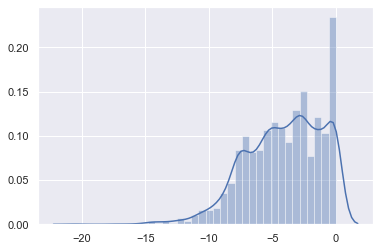

In [134]:
print(mean(Repeat_energy_0))
print(stdev(Repeat_energy_0))
sns.distplot(Repeat_energy_0)

-9.167298578199052
3.554620241429303


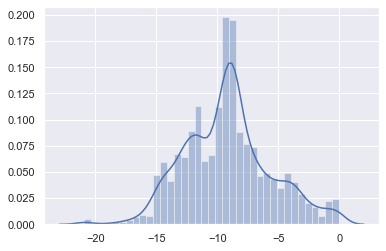

In [135]:
print(mean(Repeat_energy_1))
print(stdev(Repeat_energy_1))
sns.distplot(Repeat_energy_1)

-4.805535841022001
4.054877972427089


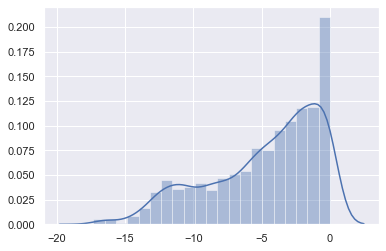

In [136]:
print(mean(Repeat_energy_2))
print(stdev(Repeat_energy_2))
sns.distplot(Repeat_energy_2)

-12.755725190839694
2.7233117673219924


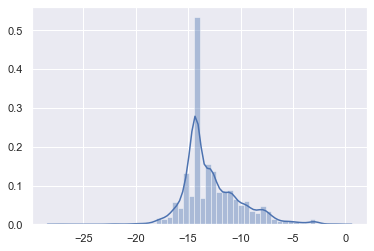

In [137]:
print(mean(Repeat_energy_3))
print(stdev(Repeat_energy_3))
sns.distplot(Repeat_energy_3)

-9.046141304347826
4.602066650122184


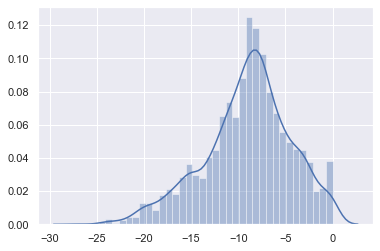

In [138]:
print(mean(Repeat_energy_4))
print(stdev(Repeat_energy_4))
sns.distplot(Repeat_energy_4)

-11.52640026203734
3.8576901520130322


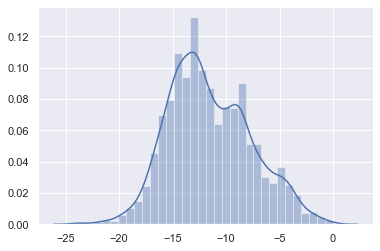

In [139]:
print(mean(Repeat_energy_5))
print(stdev(Repeat_energy_5))
sns.distplot(Repeat_energy_5)

-1.942060645582002
2.4088330993305664


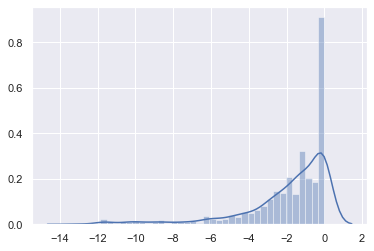

In [140]:
print(mean(Repeat_energy_6))
print(stdev(Repeat_energy_6))
sns.distplot(Repeat_energy_6)

-5.204176446918383
3.836559439309668


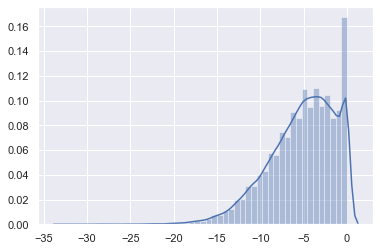

In [141]:
print(mean(Spacer_energy_0))
print(stdev(Spacer_energy_0))
sns.distplot(Spacer_energy_0)

-3.5933265258031577
3.0490367778522334


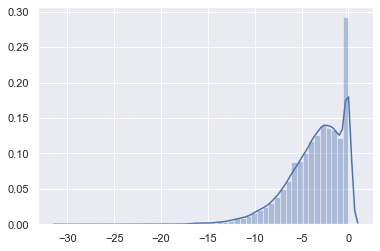

In [142]:
print(mean(Spacer_energy_1))
print(stdev(Spacer_energy_1))
sns.distplot(Spacer_energy_1)

-4.032210377003036
3.0713805798279648


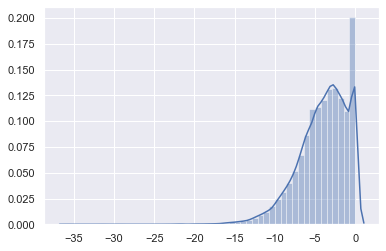

In [143]:
print(mean(Spacer_energy_2))
print(stdev(Spacer_energy_2))
sns.distplot(Spacer_energy_2)

-6.093663080233631
4.789349643169752


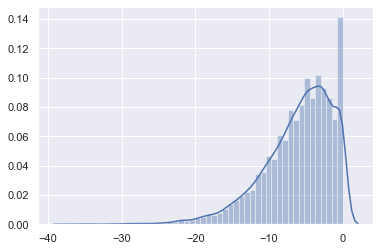

In [144]:
print(mean(Spacer_energy_3))
print(stdev(Spacer_energy_3))
sns.distplot(Spacer_energy_3)

-6.798595512431777
4.364479029029934


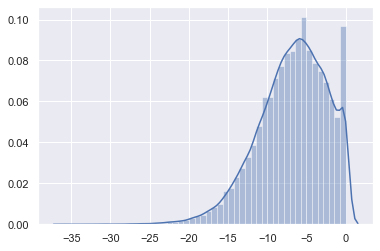

In [145]:
print(mean(Spacer_energy_4))
print(stdev(Spacer_energy_4))
sns.distplot(Spacer_energy_4)

-6.736453032595241
3.912873599529499


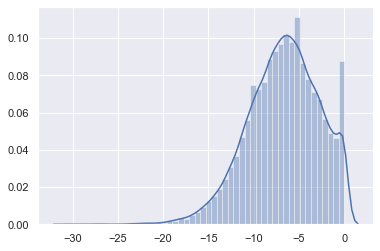

In [146]:
print(mean(Spacer_energy_5))
print(stdev(Spacer_energy_5))
sns.distplot(Spacer_energy_5)

-3.1442723851340757
3.0333434926758733


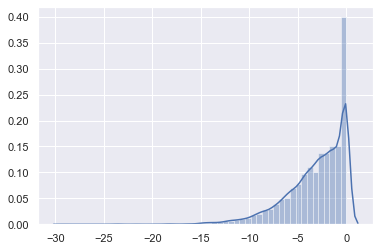

In [147]:
print(mean(Spacer_energy_6))
print(stdev(Spacer_energy_6))
sns.distplot(Spacer_energy_6)